<h2>Assumptions Check</h2>
<h3>Normality, collinearity and singularity</h3>

<br>(c) Marie-Eve Picard, Maude Picard, Andreanne Proulx, 2021

<b>Description</b>
<br>This script can be used to verified:
<ul><li>Accuracy of the dataset</li>
<li>Normality</li>
<li>Collinearity</li></ul>
<br>Steps for assumptions check are based on Tabachnick & Fidell, 2018

In [44]:
#import required modules
import pandas as pd 
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline
#from statsmodels.graphics.gofplots import qqplot
from scipy.spatial.distance import mahalanobis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [7]:
#set pandas option so that we can see the entire dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

<b>Import the dataset</b>

In [8]:
#Change the file_name variable with / (and not \)
#Make sure any type of missing value can be identify

file_name = 'C:/Users/mepic/OneDrive/Documents/Master/PSY6002/TP/donnees_tp1_v2.sav'

missing_values = ["n/a","na","--"]

file_extension = file_name.split(".",1)[1]
if file_extension == 'csv':
    df = pd.read_csv(file_name, na_values = missing_values)
elif file_extension == 'xlsx':
    df = pd.read_excel(file_name, na_values = missing_values)
elif file_extension == 'sav':
    df = pd.read_spss(file_name)

<b>Accuracy of Data File</b>
<br>Check for possible duplicated rows

In [9]:
#Overview of the dataset
df.head()

,Sujet,Genre,Age,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
0,1.0,Masculin,15.0,4.0,4.0,2.0,6.0,3.0,4.0,4.0,6.0,4.0,4.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,2.0,2.0,3.0,1.0,5.0,1.0,1.0,2.0,5.0,1.0,2.0,5.0,2.0,2.0,2.0,5.0,3.0,3.0,4.0,4.0
1,2.0,Masculin,15.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,5.0,4.0,4.0,6.0,6.0,6.0,6.0,5.0,1.0,5.0,2.0,6.0,1.0,6.0,1.0,5.0,2.0,4.0,1.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0
2,3.0,Féminin,14.0,5.0,6.0,3.0,6.0,3.0,6.0,5.0,6.0,3.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
3,4.0,Féminin,14.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,3.0,6.0,6.0,6.0,4.0,6.0,5.0,6.0,5.0,3.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
4,5.0,Féminin,14.0,6.0,6.0,5.0,6.0,3.0,6.0,6.0,6.0,4.0,6.0,4.0,4.0,1.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,3.0,6.0,6.0,2.0,5.0,4.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [10]:
#Overview of the dataset
df.columns

Index(['Sujet', 'Genre', 'Age', 'MA1001', 'MA1012r', 'MA1023', 'MA1034r',
       'MA1045', 'MA1056r', 'MA1067', 'MA1078r', 'MA1089', 'MA1096r', 'PH2005',
       'PH2027', 'PH2049', 'PH2071', 'ph2016r', 'ph2038r', 'ph2060r',
       'ph2082r', 'VE1006r', 'VE1017', 'VE1028r', 'VE1039', 'VE1050r',
       'VE1061', 'VE1072r', 'VE1083', 'VE1092r', 'VE1099', 'SS1009', 'SS1031',
       'SS1053', 'SS1075', 'SS1094', 'ss1020r', 'ss1042r', 'ss1064r',
       'ss1086r', 'ss1101r'],
      dtype='object')

In [11]:
#Change the dataframe to include only the targeted variables
#In this case, remove Sujet, Genre and Age columns
df_tp = df.drop(df.columns[[0,1,2]], axis = 1)
df_tp.head()

,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
0,4.0,4.0,2.0,6.0,3.0,4.0,4.0,6.0,4.0,4.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,2.0,2.0,3.0,1.0,5.0,1.0,1.0,2.0,5.0,1.0,2.0,5.0,2.0,2.0,2.0,5.0,3.0,3.0,4.0,4.0
1,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,5.0,4.0,4.0,6.0,6.0,6.0,6.0,5.0,1.0,5.0,2.0,6.0,1.0,6.0,1.0,5.0,2.0,4.0,1.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0
2,5.0,6.0,3.0,6.0,3.0,6.0,5.0,6.0,3.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
3,4.0,4.0,3.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,3.0,6.0,6.0,6.0,4.0,6.0,5.0,6.0,5.0,3.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
4,6.0,6.0,5.0,6.0,3.0,6.0,6.0,6.0,4.0,6.0,4.0,4.0,1.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,3.0,6.0,6.0,2.0,5.0,4.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [6]:
#Identify categorical variables when needed
#categ_var:= list of the categorical variables (df columns name)
#ex: if df.columns -> 'name', 'education', 'score1', 'score2'; the arguments in the identif_categ function will be in the form of ['name', 'education']

#def identif_categ(categ_var): 
#    for i in range (len(categ_var)):
#        df_tp[categ_var[i]] = df_tp[categ_var[i]].astype('object')

In [49]:
#Args := list of categorical columns (String)
#identif_categ([""])

In [48]:
#dataframe with only continuous variables
#df_continuous = df_tp.select_dtypes(exclude = ['object'])
#df_continuous.head()

<b>Descriptive Stats with the original dataset (including missing values)</b>
<ul><li>Mean & std</li>
<li>Min & Max</li>
<li>Number of missing</li>
<li>Skewness & Kurtosis</li></ul>

In [12]:
#Descriptive stats for continuous variables (count, mean, std, min/max, quartiles, missing values). 
# Include = 'all' -> to check if there are missing values also for categorical variables
#To read .sav files, make sure -> pip install pyreadstat

des1 = df_tp.describe(include = 'all')
des2 = df_tp.isnull().sum().to_frame(name = 'missing').T
df_des = pd.concat([des1, des2])
df_des

,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
count,619.000000,617.000000,618.000000,616.000000,613.000000,620.000000,620.000000,616.000000,616.000000,619.000000,614.000000,619.000000,617.000000,621.000000,619.000000,615.000000,621.000000,619.000000,620.000000,620.000000,620.000000,616.000000,619.000000,619.000000,619.000000,619.000000,619.000000,620.000000,620.000000,618.000000,618.000000,614.000000,616.000000,618.000000,615.000000,617.000000,620.000000,620.000000
mean,3.583199,3.627229,2.380259,4.003247,2.166395,3.993548,3.758065,4.375000,3.569805,3.567044,4.617264,4.495961,3.755267,3.900161,4.655897,4.609756,5.024155,5.048465,4.106452,2.569355,4.096774,3.712662,4.268174,3.226171,3.893376,3.882068,4.155089,4.027419,2.856452,4.574434,4.001618,4.197068,4.116883,4.606796,4.565854,4.581848,4.535484,4.454839
std,1.670448,1.772015,1.445744,1.643906,1.376167,1.611737,1.619604,1.697619,1.656227,1.790829,1.559613,1.520486,1.542707,1.597281,1.491999,1.493930,1.428194,1.358508,1.588007,1.484447,1.526393,1.470657,1.556635,1.715311,1.843805,1.492371,1.516421,1.443908,1.420041,1.465473,1.324864,1.249571,1.351653,1.463467,1.378690,1.343646,1.342856,1.334115
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,4.000000,4.000000,2.000000,4.000000,2.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,6.000000,6.000000,4.000000,2.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,3.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.000000,4.000000,5.000000,5.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,4.000000,6.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
missing,6.000000,8.000000,7.000000,9.000000,12.000000,5.000000,5.000000,9.000000,9.000000,6.000000,11.000000,6.000000,8.000000,4.000000,6.000000,10.000000,4.000000,6.000000,5.000000,5.000000,5.000000,9.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,7.000000,7.000000,11.000000,9.000000,7.000000,10.000000,8.000000,5.000000,5.000000


In [13]:
#Compute % of missing values
nb_missing = df_des.loc['missing', : ].sum()
nb_tot = len(df_tp[df_tp.columns[0]]) * len(df_tp.columns)
print("% missing data: ", 100*nb_missing/nb_tot)

% missing data:  1.111578947368421


<b>Skewness & Kurtosis</b>

In [14]:
#calculate skewness
df_skew = df_tp.skew(axis = 0, skipna = True)
df_skew = pd.DataFrame({'VI': df_skew.index, 'Value': df_skew.values})
print(df_skew)

         VI     Value
0    MA1001 -0.096437
1   MA1012r -0.148379
2    MA1023  0.782279
3   MA1034r -0.423821
4    MA1045  1.113721
5   MA1056r -0.454028
6    MA1067 -0.306995
7   MA1078r -0.808725
8    MA1089 -0.133841
9   MA1096r -0.139475
10   PH2005 -0.973525
11   PH2027 -0.891452
12   PH2049 -0.176365
13   PH2071 -0.343704
14  ph2016r -0.887436
15  ph2038r -1.001280
16  ph2060r -1.498974
17  ph2082r -1.564263
18  VE1006r -0.481315
19   VE1017  0.655379
20  VE1028r -0.434436
21   VE1039 -0.246066
22  VE1050r -0.558079
23   VE1061  0.155382
24  VE1072r -0.318346
25   VE1083 -0.444955
26  VE1092r -0.501622
27   VE1099 -0.393652
28   SS1009  0.322828
29   SS1031 -0.898773
30   SS1053 -0.489628
31   SS1075 -0.704260
32   SS1094 -0.677098
33  ss1020r -0.966274
34  ss1042r -0.968081
35  ss1064r -0.890119
36  ss1086r -0.885056
37  ss1101r -0.795628


In [18]:
#print min and max skewness values with the corresponding variables
print(df_skew.loc[df_skew['Value']==min(df_skew['Value']), 'VI'], "Score min skewness: ", min(df_skew['Value']), "\n", df_skew.loc[df_skew['Value']==max(df_skew['Value']), 'VI'], "Score max skewness: ", max(df_skew['Value']))

17    ph2082r
Name: VI, dtype: object Score min skewness:  -1.5642625073536935 
 4    MA1045
Name: VI, dtype: object Score max skewness:  1.1137212635833538


In [16]:
#Calculate kurtosis
df_kurtosis = df_tp.kurtosis(axis = 0, skipna = True)
df_kurtosis = pd.DataFrame({'VI': df_kurtosis.index, 'Value': df_kurtosis.values})
print(df_kurtosis)

         VI     Value
0    MA1001 -1.133959
1   MA1012r -1.310943
2    MA1023 -0.414935
3   MA1034r -1.008112
4    MA1045  0.412055
5   MA1056r -0.898595
6    MA1067 -1.049520
7   MA1078r -0.605651
8    MA1089 -1.177056
9   MA1096r -1.316010
10   PH2005 -0.182872
11   PH2027 -0.175145
12   PH2049 -1.004780
13   PH2071 -0.977036
14  ph2016r -0.306934
15  ph2038r  0.015142
16  ph2060r  1.230690
17  ph2082r  1.641583
18  VE1006r -0.816748
19   VE1017 -0.564117
20  VE1028r -0.837755
21   VE1039 -0.833375
22  VE1050r -0.812985
23   VE1061 -1.209300
24  VE1072r -1.328264
25   VE1083 -0.686343
26  VE1092r -0.792653
27   VE1099 -0.705325
28   SS1009 -0.850784
29   SS1031 -0.122198
30   SS1053 -0.371680
31   SS1075  0.238609
32   SS1094 -0.089204
33  ss1020r  0.036152
34  ss1042r  0.297846
35  ss1064r  0.099940
36  ss1086r  0.107179
37  ss1101r  0.087681


In [17]:
#print min and max kurtosis values with the corresponding variables
print(df_kurtosis.loc[df_kurtosis['Value']==min(df_kurtosis['Value']), 'VI'], "Score min kurtosis: ", min(df_kurtosis['Value']), "\n", df_kurtosis.loc[df_kurtosis['Value']==max(df_kurtosis['Value']), 'VI'], "Score max kurtosis: ", max(df_kurtosis['Value']))

24    VE1072r
Name: VI, dtype: object Score min kurtosis:  -1.3282638965991718 
 17    ph2082r
Name: VI, dtype: object Score max kurtosis:  1.6415829088811216


<b>Z scores (univariate outliers)</b>

In [19]:
#Create an empty new dataframe for zscores
columns_name = df_tp.columns
df_zscores = pd.DataFrame(columns = columns_name)

In [20]:
#Calculate z scores(univariate outliers) for all variables
i=0
while i < len(df_tp.columns):
    if df_tp.columns[i] == df_zscores.columns[i]:
        df_zscores[df_zscores.columns[i]] = stats.zscore(df_tp[df_tp.columns[i]], nan_policy='omit')
        i+=1
    else:
        print('error')
        break

In [21]:
#overview of the zscores dataframe
df_zscores.head()

,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
0,0.249716,0.210537,-0.263233,1.215626,0.606239,0.004006,0.149500,0.958001,0.259955,0.241959,0.887312,0.989983,1.456242,0.689125,0.901603,0.931353,0.683823,0.700993,-1.327546,-0.383856,-0.719120,-1.846023,0.470513,-1.298873,-1.570511,-1.262146,0.557625,-2.098378,-0.603604,0.290630,-1.512034,-1.759692,-1.567416,0.268897,-1.136679,-1.178235,-0.399087,-0.341204
1,0.848842,1.340111,1.813504,1.215626,2.060737,1.245905,0.767433,0.958001,0.864228,1.359663,0.245605,0.331767,0.158767,0.062556,0.901603,0.931353,0.683823,0.700993,0.563140,-1.058052,0.592216,-1.165503,1.113444,-1.298873,1.143466,-1.932763,0.557625,-1.405254,0.805943,-2.441075,0.754183,0.643090,0.653891,0.952760,0.315154,0.311460,0.346196,0.408961
2,0.848842,1.340111,0.429013,1.215626,0.606239,1.245905,0.767433,0.958001,-0.344318,1.359663,0.245605,0.331767,0.807504,1.315693,0.901603,0.931353,0.683823,0.700993,1.193368,1.638730,1.247884,1.556581,1.113444,1.034951,1.143466,0.749704,1.217606,1.367244,2.215490,0.973557,1.509589,0.643090,0.653891,0.952760,1.041071,1.056307,1.091479,1.159127
3,0.249716,0.210537,0.429013,0.606825,2.060737,0.624956,0.767433,0.958001,0.864228,0.800811,-1.679518,0.331767,1.456242,1.315693,0.901603,0.261432,0.683823,0.700993,1.193368,0.290339,1.247884,1.556581,1.113444,0.451495,1.143466,0.749704,1.217606,0.674119,0.101169,0.290630,0.754183,0.643090,0.653891,0.952760,1.041071,1.056307,1.091479,1.159127
4,1.447968,1.340111,1.813504,1.215626,0.606239,1.245905,1.385367,0.958001,0.259955,1.359663,-0.396103,-0.326450,-1.787445,0.062556,-0.439965,0.261432,-0.717676,-0.772401,0.563140,0.290339,0.592216,0.876060,0.470513,-0.131961,1.143466,1.420321,-1.422317,0.674119,0.805943,0.290630,1.509589,1.444017,1.394327,0.952760,1.041071,1.056307,1.091479,1.159127


In [22]:
#Return index and columns where the zscore > 3.29, if no |zscores| > 3.29 in the entire dataframe: "no value exceeding 3.29"

ls_outliers=[]
for i in range(len(df_zscores.columns)):
    if df_zscores.loc[np.abs(df_zscores[df_zscores.columns[i]]) > 3.29].empty == False:
        df_zscores.loc[df_zscores[df_zscores.columns[i]] > 3.29]
        ls_outliers.append(True)

if len(ls_outliers) == 0:
    print("no zscores exceeding 3.29")

no zscores exceeding 3.29


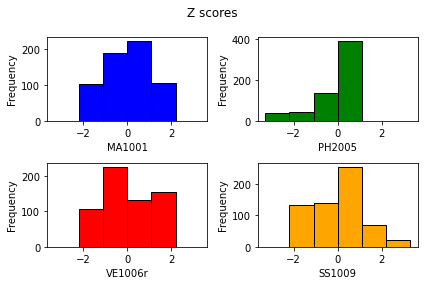

In [23]:
#Z scores histograms for MA1001, PH2005, VE1006r, SS1009
var_interest = ['MA1001','PH2005','VE1006r','SS1009']
ls_color = ['blue', 'green', 'red', 'orange']

for i in range (len(var_interest)):
    plt.subplot(2,2,i+1)
    plt.hist(df_zscores[var_interest[i]], color = ls_color[i], edgecolor = 'black',bins = 6,range=(-3.29,3.29))
    plt.suptitle('Z scores')
    plt.xlabel(var_interest[i])
    plt.ylabel('Frequency')
    plt.tight_layout()

<b>Bivariate relationship linearity</b>

In [50]:
#Create a 2D list of variables to compared
#6 comparisons:
#MA1001 vs PH2005
#MA1001 Vs VE1006r
#MA1001 vs SS1009
#PH2005 vs VE1006r
#PH2005 vs SS1009
#VE1006r vs SS1009

#ls_bivar_plot = [['MA1001','MA1001', 'MA1001','PH2005','PH2005','VE1006r'],['PH2005', 'VE1006r', 'SS1009','VE1006r','SS1009','SS1009']]


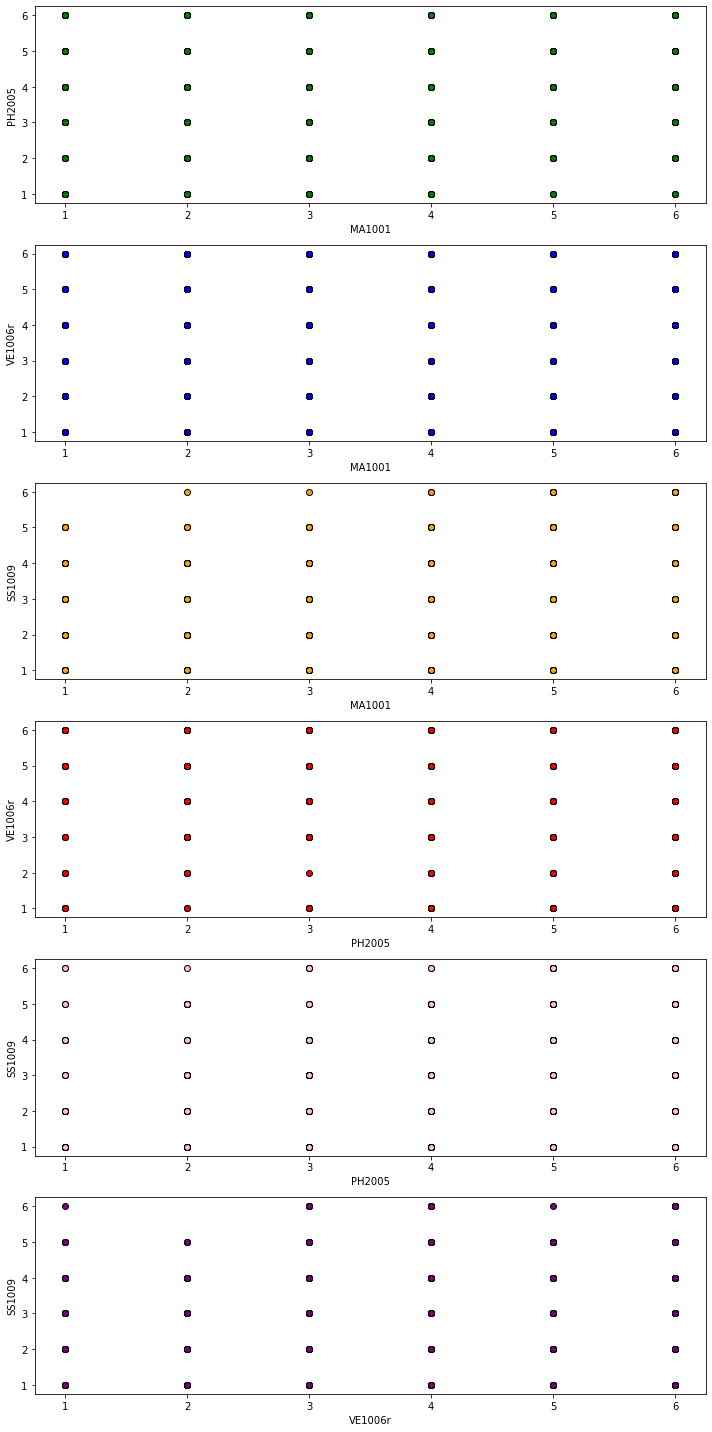

In [55]:
nb_comp = 6
fig, ax = plt.subplots(figsize=(10,20))
ls_c = ['green','blue','orange','red','pink','purple']

for i in range(nb_comp):
    plt.subplot(6,1,i+1)
    x_plot = ls_bivar_plot[0][i]
    y_plot = ls_bivar_plot[1][i]
    plt.scatter(df_tp[x_plot], df_tp[y_plot], c = ls_c[i], edgecolors = 'black' )
    plt.xlabel(x_plot)
    plt.ylabel(y_plot)
    plt.tight_layout()


<b>Multivariate outliers</b>
<br>For TP1 only MA1001, PH2005, VE1006r and SS1009 will be tested for normality assumptions 

In [26]:
#Create dataframe without missing values
df_dropna = df_tp.dropna()

In [74]:
#Calculate multivariate outliers (mahalanobis distance)
#https://www.machinelearningplus.com/statistics/mahalanobis-distance/

def mahalanobis_outliers(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov=np.cov(data.values.T)
    inv_covmat = scipy.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    return md

df_mahal = df_dropna[['MA1001','PH2005','VE1006r','SS1009']]
df_mahal['mahal'] = mahalanobis_outliers(x = df_mahal, data = df_dropna[['MA1001','PH2005','VE1006r','SS1009']])
df_mahal.head(50)

,MA1001,PH2005,VE1006r,SS1009,mahal
0,4.0,6.0,2.0,2.0,1.688988
1,5.0,5.0,5.0,4.0,1.132817
2,5.0,5.0,6.0,6.0,2.389980
3,4.0,2.0,6.0,3.0,2.155740
4,6.0,4.0,5.0,4.0,1.697385
5,1.0,1.0,6.0,1.0,3.055199
6,3.0,2.0,3.0,3.0,2.023723
7,4.0,6.0,3.0,4.0,1.446529
8,1.0,6.0,3.0,1.0,2.124374
9,1.0,6.0,6.0,2.0,2.186498


In [56]:
#Compute critical Chi2 value 
dfreedom = len(var_interest) - 1
signlevel = 0.01
chi_critic = stats.chi2.ppf((1-signlevel), df = dfreedom)
chi_critic

11.344866730144373

In [79]:
#Test if mahalanobis distance > critical chi
for i in range (len(df_mahal['mahal'])):
    try:
        if df_mahal['mahal'][i] > chi_critic:
            print(i)
    except:
        pass

<b>Multicollinearity & Singularity</b>
<br>VIF -> strength of the correlation between VIs

In [31]:
#Code from:
#https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
#Add a constant to the dataframe
df_constant = add_constant(df_dropna)

#Create a dataframe
vif_data = pd.DataFrame()
vif_data['Features'] = df_constant.columns
#Compute VIF for each IVs
vif_data['VIF'] = [variance_inflation_factor(df_constant.values, i) for i in range(len(df_constant.columns))]

print(vif_data)

   Features        VIF
0     const  44.470267
1    MA1001   4.645117
2   MA1012r   4.517904
3    MA1023   2.522463
4   MA1034r   3.555179
5    MA1045   1.794249
6   MA1056r   3.943988
7    MA1067   4.753229
8   MA1078r   1.982331
9    MA1089   3.676130
10  MA1096r   2.652681
11   PH2005   2.172180
12   PH2027   2.979575
13   PH2049   2.144046
14   PH2071   1.598443
15  ph2016r   1.944914
16  ph2038r   2.205183
17  ph2060r   1.912932
18  ph2082r   2.606851
19  VE1006r   2.382360
20   VE1017   1.908372
21  VE1028r   2.117178
22   VE1039   3.308328
23  VE1050r   2.014356
24   VE1061   3.337248
25  VE1072r   1.547188
26   VE1083   3.805453
27  VE1092r   1.273954
28   VE1099   3.834108
29   SS1009   1.659525
30   SS1031   1.327103
31   SS1053   2.547548
32   SS1075   3.484388
33   SS1094   3.395910
34  ss1020r   2.299870
35  ss1042r   3.249078
36  ss1064r   3.797424
37  ss1086r   3.286649
38  ss1101r   3.082910
